# Задание 1 

Ответы впишите в [гугл-форму](https://goo.gl/forms/XzNSmbOyrb7aSiIN2).

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Будем работать с данными об автомобилях:

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
car=pd.read_csv('/content/drive/My Drive/cardataset.csv')
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Убедитесь, что понимаете название каждого признака (MPG -  miles per gallon, расход топлива; MSRP-manufacturer's suggested retail price, рекомендованная производителем розничная цена).

In [0]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


## Ответьте на следующие вопросы. 

#### 1. Сколько всего объектов в выборке?

In [0]:
car.shape[0]#ваш код здесь  

11914

#### 2. Сколько различных автопроизводителей?

In [0]:
car['Make'].nunique()#ваш код здесь  

48

#### 3. Постройте рейтинг производителей по числу представленных автомобилей. Какое место занимает в этом рейтинге Toyota? 

In [0]:
rating = car['Make'].value_counts()#ваш код здесь  
pos_rat = pd.DataFrame({'Company':rating.index, 'Number of cars':rating.values})
print(pos_rat,'\n')
print("Toyota's position is",pos_rat.loc[pos_rat['Company']=='Toyota'].index[0]+1)

          Company  Number of cars
0       Chevrolet            1123
1            Ford             881
2      Volkswagen             809
3          Toyota             746
4           Dodge             626
5          Nissan             558
6             GMC             515
7           Honda             449
8           Mazda             423
9        Cadillac             397
10  Mercedes-Benz             353
11         Suzuki             351
12            BMW             334
13       Infiniti             330
14           Audi             328
15        Hyundai             303
16          Volvo             281
17         Subaru             256
18          Acura             252
19            Kia             231
20     Mitsubishi             213
21          Lexus             202
22          Buick             196
23       Chrysler             187
24        Pontiac             186
25        Lincoln             164
26     Oldsmobile             150
27     Land Rover             143
28        Pors

####    4. Каким может быть число дверей у автомобиля в выборке?

In [0]:
doors = set(car['Number of Doors'].dropna())#ваш код здесь  
print("Cars can have",doors, 'doors')

print("Total number of categories",car['Number of Doors'].nunique())

Cars can have {2.0, 3.0, 4.0} doors
Total number of categories 3


####    5. Каков процент четырехдверных автомобилей?

In [0]:
per = len(car.loc[car['Number of Doors']==4])/len(car)#ваш код здесь  
print("Percantege of 4-door cars is", per*100)

Percantege of 4-door cars is 70.1107940238375


#### 6. Составьте таблицу топ-100 самых дорогих автомобилей в выборке. Сколько автопроизводителей вошло в топ-100? 

In [0]:
expensive = car.sort_values(by='MSRP', ascending=False).head(100)
print(expensive,'\n')
print('Number of diferrent manufactures in top-100 most expensive cars is',expensive["Make"].nunique())#ваш код здесь 

               Make        Model  Year  ... city mpg  Popularity     MSRP
11362       Bugatti  Veyron 16.4  2008  ...        8         820  2065902
11364       Bugatti  Veyron 16.4  2009  ...        8         820  1705769
8486    Lamborghini     Reventon  2008  ...        9        1158  1500000
11363       Bugatti  Veyron 16.4  2008  ...        8         820  1500000
6351        Maybach    Landaulet  2012  ...       10          67  1382750
...             ...          ...   ...  ...      ...         ...      ...
2891        Bentley  Continental  2001  ...       10         520   299900
7020        Bentley     Mulsanne  2014  ...       11         520   298900
3546   Aston Martin          DBS  2012  ...       12         259   296387
11206  Aston Martin     Vanquish  2014  ...       13         259   296295
5281    Rolls-Royce        Ghost  2013  ...       13          86   296000

[100 rows x 16 columns] 

Number of diferrent manufactures in top-100 most expensive cars is 10


####    7. Много ли автомобилей Lexus вошли в топ-100? 

In [0]:
print("Number of Lexus models in top 100 is",len(expensive.loc[expensive['Make']=='Lexus']))#ваш код здесь 

Number of Lexus models in top 100 is 1


####    8. Сколько различных моделей Bentley представлено в топ-100? 

In [0]:
print(len(expensive.groupby('Make').get_group('Bentley')['Model'].value_counts()))


6


####    9.  Выберите верные утверждения:
    
* Наиболее дорогие в среднем автомобили в топ-100 - это автомобили производства Maybach. 
    
* Среди автомобилей топ-100 нет автомобилей с механической коробкой передач (MANUAL). 
    
* Все автомобили топ-100 потребляют одну категорию топлива (Engine Fuel Type). 
    
* Среди автомобилей топ-100 нет автомобилей старше 8 лет. 
    
* Большинство автомобилей топ-100 имею 12 цилиндров. 
    
* У большинства автомобилей топ-100 большие колеса. 

In [0]:
#1
print("1. Most expensive cars are made by Maybach:",
      expensive.groupby('Make')['MSRP'].mean().sort_values(ascending=False).index[0]=='Maybach')

#2
print("2. There are no cars with manual transmission:",
      len(expensive.loc[expensive["Transmission Type"]=="MANUAL"])==0)#ваш код здесь

#3
print("3. All cars in top-100 consume the same engine fuel type:",
      expensive['Engine Fuel Type'].nunique()==1)

#4
print("4. There are no cars in top-100 older then 8 years:",
      len(expensive.loc[expensive['Year']<2012])==0)

#5
print("5. Most cars in top-100 have 12-cylinders:",
      expensive["Engine Cylinders"].value_counts().index[0]==12)

#6
print("6. Most cars in top-100 are Large:",
      expensive["Vehicle Size"].value_counts().index[0]=="Large")

print('\n',"True ones are 3, 5, 6")

1. Most expensive cars are made by Maybach: False
2. There are no cars with manual transmission: False
3. All cars in top-100 consume the same engine fuel type: True
4. There are no cars in top-100 older then 8 years: False
5. Most cars in top-100 have 12-cylinders: True
6. Most cars in top-100 are Large: True

 True ones are 3, 5, 6


####    10. Постройте распределения расхода топлива по городу (city mpg) для автомобилей с ручной коробкой передач и автоматической. 
Не забудьте про подписи осей, размеры шрифтов, легенду.

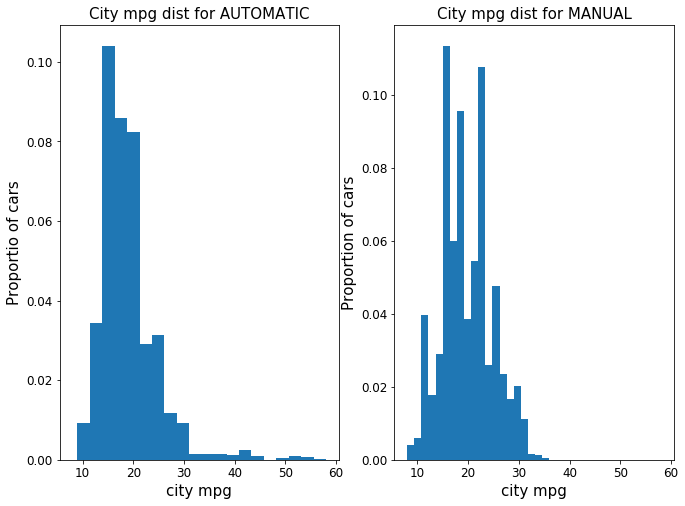

In [33]:
#ваш код здесь
from google.colab import files

tt = car.groupby("Transmission Type")

#car.loc[car['Transmission Type'].isin(['AUTOMATIC','MANUAL'])].group_

fig, axs = plt.subplots(1, 2, sharex=True, tight_layout=False)
n_bins= 20

fig.set_size_inches(11,8)
plt.rc('font', size=12) 

axs[0].hist(tt.get_group('AUTOMATIC')['city mpg'], bins=n_bins, density=True)
axs[0].set_xlabel('city mpg', fontsize=15)
axs[0].set_ylabel('Proportio of cars', fontsize=15)
axs[0].set_title('City mpg dist for AUTOMATIC',fontsize=15)

axs[1].hist(tt.get_group('MANUAL')['city mpg'], bins=n_bins, density=True)
axs[1].set_xlabel('city mpg', fontsize=15)
axs[1].set_ylabel('Proportion of cars', fontsize=15)
axs[1].set_title('City mpg dist for MANUAL',fontsize=15)

plt.savefig("citympg.png")
files.download("citympg.png") 

#plt.show()


####    11. Постройте зависимость средней стоимости автомобиля от числа цилиндров. 
Используйте функцию plt.errorbar, чтобы помимо средних значений отобразить среднеквадратичное отклонение величины.

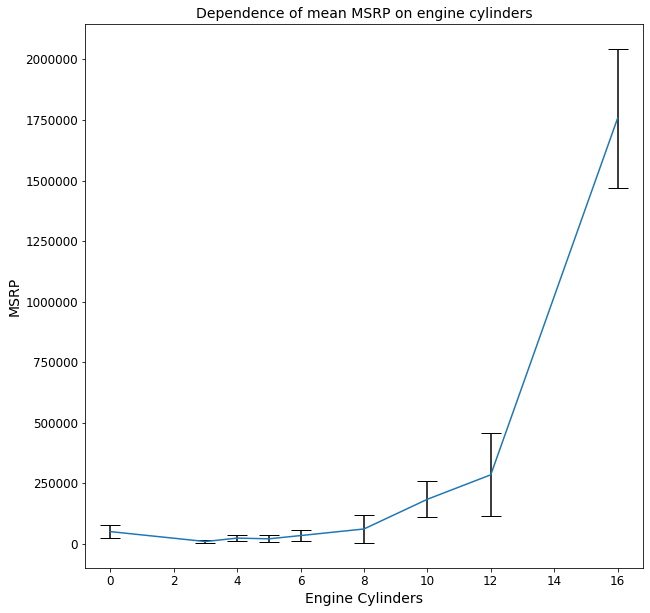

In [36]:
mean_price = car.groupby('Engine Cylinders')['MSRP'].mean()
std_errors = car.groupby('Engine Cylinders')['MSRP'].std()

fig = plt.figure(figsize=(10,10))
plt.title("Dependence of mean MSRP on engine cylinders", fontsize=14)
plt.xlabel('Engine Cylinders', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

plt.errorbar(mean_price.index, mean_price.values,yerr=std_errors,ecolor='black',
       capsize=10)
#plt.show()

plt.savefig("msrp.png")
files.download("msrp.png") 
#ваш код здесь 

####    12. Постройте boxplot, отображающий распределение стоимости автомобилей следующих марок: Audi, Toyota, BMW, Mazda, Hyundai. 
Не забудьте про подписи осей, размеры шрифтов.

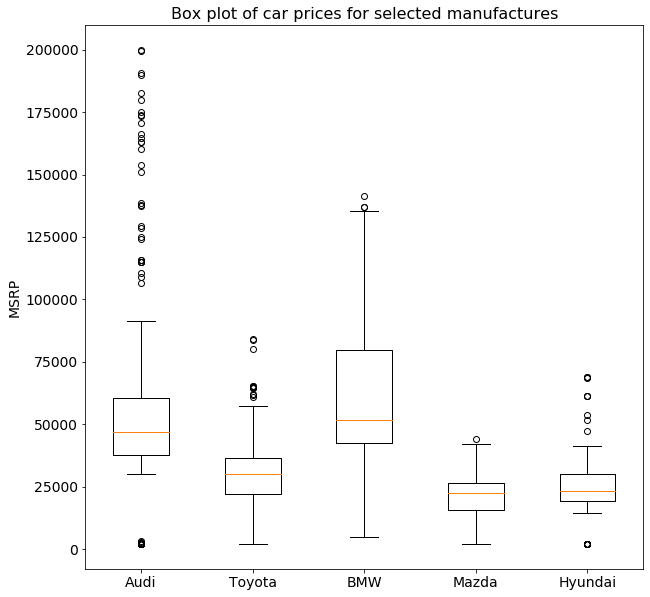

In [38]:
audi = car[(car['Make'] == 'Audi')]['MSRP'].dropna().values
toyota = car[(car['Make'] == 'Toyota')]['MSRP'].dropna().values
bmw = car[(car['Make'] == 'BMW')]['MSRP'].dropna().values
mazda = car[(car['Make'] == 'Mazda')]['MSRP'].dropna().values
hyundai = car[(car['Make'] == 'Hyundai')]['MSRP'].dropna().values

fig = plt.figure(figsize=(10,10))
plt.boxplot([audi, toyota, bmw, mazda, hyundai],
                labels=['Audi', 'Toyota', 'BMW', 'Mazda', 'Hyundai'],)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.title("Box plot of car prices for selected manufactures",fontsize=16)

plt.savefig("box_plot.png")
files.download("box_plot.png")
plt.show()
#ваш код здесь 